## Random Forest Test on GWL Timeseries in Steenkoppies A2N0612


## 1. import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from numpy import array, hstack, math
from numpy.random import uniform
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
np.random.seed(42)
from sklearn.metrics import r2_score

## 2. Import data 

In [2]:
data=pd.read_excel(r'C:\Users\Kirsty\Desktop\Steenkoppies Data\1. GWL background decline\A2N0612\A2N0612.xlsx', parse_dates=['date'],  index_col='date')

In [3]:
data.head(5)

,GWL,River Discharge,Rainfall,Temperature,Groundwater usage
date,,,,,
1989-05-01,-55.14,0.379,3.021605,12.20,13.45
1989-06-01,-55.11,0.386,35.249315,9.45,13.45
1989-07-01,-55.09,0.390,0.000000,9.00,13.45
1989-08-01,-55.08,0.384,0.000000,12.85,13.45
1989-09-01,-55.25,0.361,0.000000,13.85,13.45


In [4]:
data.dtypes

GWL                  float64
River Discharge      float64
Rainfall             float64
Temperature          float64
Groundwater usage    float64
dtype: object

In [5]:
print('The shape of our features is:', data.shape)

The shape of our features is: (342, 5)


In [ ]:
#Sandardise
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data= pd.DataFrame(scaler.fit_transform(feature), columns=feature.columns, index=feature.index)

In [6]:
#Normalisng
#import pandas as pd
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

#feature= pd.DataFrame(scaler.fit_transform(feature), columns=feature.columns, index=feature.index)

In [7]:
data

,GWL,River Discharge,Rainfall,Temperature,Groundwater usage
date,,,,,
1989-05-01,-55.14,0.379,3.021605,12.200000,13.45
1989-06-01,-55.11,0.386,35.249315,9.450000,13.45
1989-07-01,-55.09,0.390,0.000000,9.000000,13.45
1989-08-01,-55.08,0.384,0.000000,12.850000,13.45
1989-09-01,-55.25,0.361,0.000000,13.850000,13.45
...,...,...,...,...,...
2017-06-01,-56.52,0.174,0.000000,11.649500,29.92
2017-07-01,-56.50,0.191,0.500000,12.172903,29.92
2017-08-01,-56.54,0.196,0.000000,12.699355,29.92


## 3. Visualise data 

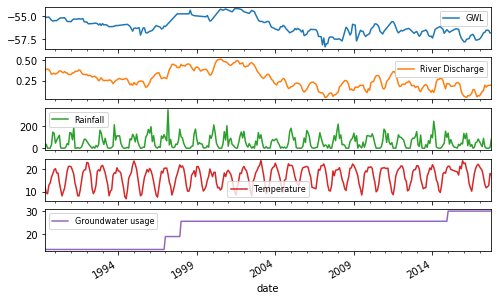

In [8]:
# Plotting
data.plot(kind='line', subplots=True,
     legend=False)

[ax.legend(loc="best", prop={'size': 8}) for ax in plt.gcf().axes]
plt.gcf().set_size_inches(8,5)

##  Split data: Train, test, val split 50%, 10%,10% 

change values here 

In [35]:
Xtrain5 =  data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[:171, :]
Xtrain5 = scaler.fit_transform( data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[:171, :])

D

array([[-8.82281743e-01, -8.40884054e-01,  3.66548429e-01,
        -8.90317771e-01],
       [-3.44697953e-01, -1.47387411e+00,  4.51612111e-01,
        -8.90317771e-01],
       [-9.32684508e-01, -1.57745431e+00,  5.00219929e-01,
        -8.90317771e-01],
       [-9.32684508e-01, -6.91268221e-01,  4.27308202e-01,
        -8.90317771e-01],
       [-9.32684508e-01, -4.61090017e-01,  1.47813248e-01,
        -8.90317771e-01],
       [-3.82218313e-01,  1.37373314e-01, -2.53201251e-01,
        -8.90317771e-01],
       [ 1.50624667e+00,  4.94149530e-01, -1.80289524e-01,
        -8.90317771e-01],
       [ 1.32953772e+00,  8.85452477e-01, -9.52258424e-02,
        -8.90317771e-01],
       [-1.65367994e-01,  1.01205049e+00, -2.28897342e-01,
        -8.90317771e-01],
       [ 2.95778107e-01,  5.74711901e-01, -1.19529751e-01,
        -8.90317771e-01],
       [ 6.83000495e-01,  5.63202991e-01,  1.98979372e-03,
        -8.90317771e-01],
       [ 1.03283441e+00, -4.49581107e-01,  2.32876930e-01,
      

In [9]:
#'GWL','Rainfall','Temperature','River Discharge','Groundwater usage'
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

ytrain5 = data['GWL'].iloc[:171]
df[df.columns] = scaler.fit_transform(data['GWL'].iloc[:171])

Xtrain5 = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[:171, :]

ytest5 = data['GWL'].iloc[171:206]
Xtest5  = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[171:206, :]

yval5  = data['GWL'].iloc[206:240]
Xval5 = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[206:240, :]

In [10]:
print(ytrain5.shape,Xtrain5.shape,  
      ytest5.shape,Xtest5.shape, 
      yval5.shape,Xval5.shape)

(171,) (171, 4) (35,) (35, 4) (34,) (34, 4)


## Call model

In [16]:
from sklearn.neural_network import MLPRegressor

#random.seed(42)
rf5 = MLPRegressor(random_state=42)


## 6. Train the model on training data

In [17]:
rf5.fit(Xtrain5, ytrain5)



C:\Users\Kirsty\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

## 6.1 Plot tests results 

In [18]:
training5= rf5.predict(Xtrain5)
training5 = pd.Series(training5, index=ytrain5.index)

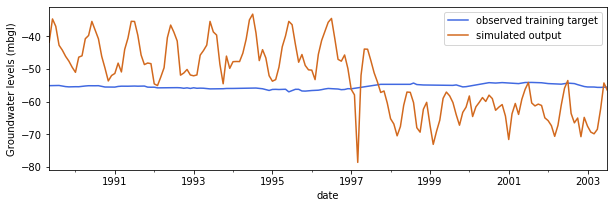

In [19]:
#plot test data 
ytrain5.plot(label='observed training target', color='royalblue')
training5.plot(label='simulated output', color='chocolate')
#plt.suptitle(' GWL Timeseries for Well A2N0553')
plt.xlabel('date')
plt.ylabel('Groundwater levels (mbgl)')

plt.gcf().set_size_inches(10,3)

plt.legend(loc = 'best')

#plt.savefig(r'C:\Users\Kirsty\Desktop\Steenkoppies Data\1. GWL background decline\A2N0617\together_rainfall A2N0617 _train')

## 6.2 Create data frame from training observed and simulated data

In [20]:
actual_train5 =np.array(ytrain5)
simulated_train5 =np.array(training5)
 
dftrain5= pd.DataFrame({'actual_train5': actual_train5, 'simulated_train5': list(simulated_train5)}, columns=['actual_train5', 'simulated_train5'])

In [21]:
dftrain5

,actual_train5,simulated_train5
0,-55.140,-41.777514
1,-55.110,-34.667769
2,-55.090,-36.927611
3,-55.080,-42.737128
4,-55.250,-44.239053
...,...,...
166,-55.560,-69.915472
167,-55.660,-68.528511
168,-55.670,-62.252035
169,-55.615,-54.307277


## 6.3 Performace metrics training

In [22]:
# Performance metrics training 
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
import math
import numpy as np
actual_train5 = dftrain5['actual_train5']
simulated_train5 = dftrain5['simulated_train5']

#MAE=metrics.mean_absolute_error (actual_train, simulated_train)
#print('Mean Absolute Error:', MAE)

#MedianAE=metrics.mean_squared_error (actual_train, simulated_train)
#print('Mean Squared Error:', MedianAE)

RMSE=np.sqrt(metrics.mean_squared_error(actual_train5, simulated_train5))
print ('Root Mean Squared Error:',RMSE)

#RMSEr=np.sqrt(sum((actual_train5-simulated_train5)/actual_train5)**2)/300
#print('Relative Root Mean Squared Error:',RMSEr)

r2_score=metrics.r2_score(actual_train5, simulated_train5)
print('r2_score:', r2_score)


#Nash Sutcliffe efficiency coefficient
NSE= 1 - sum((actual_train5-simulated_train5)**2)/sum((simulated_train5-np.mean(simulated_train5))**2)
print('Nash Sutcliffe efficiency coefficient:', NSE)



Root Mean Squared Error: 10.991195581644737
r2_score: -255.44727524595623
Nash Sutcliffe efficiency coefficient: -0.14264466313418134


## 7. Hyperparameter tuning on validation data set 

In [ ]:
param_search = {'hidden_layer_sizes': [i for i in range(100,150)],
              'activation': ['relu'],
              'solver': ['adam'],
              'learning_rate': ['constant'],
              'learning_rate_init': [0.001],
              'power_t': [0.5],
              'alpha': [0.0001],
              'max_iter': [1000],
              'early_stopping': [True],
              'warm_start': [False]}




from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
tscv = TimeSeriesSplit(n_splits=3)
gsearch = GridSearchCV(estimator=rf5, cv=tscv,
                        param_grid=param_search)
gsearch.fit(Xval5, yval5.ravel())

gsearch.best_params_

In [ ]:
clf5 = MLPRegressor(random_state=42)
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
tscv = TimeSeriesSplit(n_splits=3)

model5 = GridSearchCV(estimator = clf5, param_grid = param_search, 
                               cv = tscv, verbose= 5, n_jobs = -1)
model5.fit(Xval5,yval5)

#predictionforest = model.best_estimator_.predict(X_Test)

In [ ]:
model5.best_params_


In [ ]:
trainforest5= model5.best_estimator_.fit(Xtrain5, ytrain5)


## Predict with new parameter

In [ ]:
predictionforest5= model5.best_estimator_.predict(Xtest5)

In [ ]:
prediction5 = pd.Series(predictionforest5, index=ytest5.index)

In [ ]:
ytest5.plot(label='observed prediction target')
prediction5.plot(label='simulated prediction', color='chocolate',linestyle='dashed')
#plt.suptitle(' GWL Timeseries Prediction for Well A2N0553')
plt.xlabel('date')
plt.ylabel('Groundwater levels (mbgl)')

plt.gcf().subplots_adjust(left=0.15,bottom=0.15)
plt.legend(loc = 'best')

plt.gcf().set_size_inches(10,3)

#plt.savefig(r'C:\Users\Kirsty\Desktop\Sprediction')

## Create a data frame on test ovserved and simulated 

In [ ]:
actual_test5 =np.array(ytest5)
simulated_test5 =np.array(prediction5)

dataset_val = pd.DataFrame({'actual_test5': actual_test5, 'simulated_test5': list(simulated_test5)}, columns=['actual_test5', 'simulated_test5'])

In [ ]:
# Performance metrics training 
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
import math
import numpy as np
actual_val = dataset_val['actual_test5']
simulated_val = dataset_val['simulated_test5']

#MAE=metrics.mean_absolute_error (actual_val, simulated_val)
#print('Mean Absolute Error:', MAE)

#MedianAE=metrics.mean_squared_error (actual_val, simulated_val)
#print('Mean Squared Error:', MedianAE)

RMSE=np.sqrt(metrics.mean_squared_error(actual_val, simulated_val))
print ('Root Mean Squared Error:',RMSE)

#RMSEr=np.sqrt(sum((actual-simulated)/actual)**2)/300
#print('Relative Root Mean Squared Error:',RMSEr)

r2_score=metrics.r2_score(actual_val, simulated_val)
print('r2_score:', r2_score)


#Nash Sutcliffe efficiency coefficient
NSE= 1 - sum((actual_val-simulated_val)**2)/sum((simulated_val-np.mean(simulated_val))**2)
print('Nash Sutcliffe efficiency coefficient:', NSE)


## Plotting test and train together 

In [ ]:

ytest5.plot(label='observed prediction target')
prediction5.plot(label='simulated prediction', color='chocolate',linestyle='dashed')

ytrain5.plot(label='observed training target', color='royalblue')
training5.plot(label='simulated output', color='chocolate')

#plt.suptitle(' GWL Timeseries for Well A2N0553')
plt.xlabel('date')
plt.ylabel('Groundwater levels (mbgl)')


plt.gcf().set_size_inches(10,3)

plt.legend(loc = "best")

#plt.savefig(r'C:\Users\Kirsty\Desktop\Steenkoppies Data\1. GWL background decline\A2N0617\together_rainfall A2N0617 _train'

## train test validation split 60%

change values here 

In [ ]:
#'GWL','Rainfall','Temperature','River Discharge','Groundwater usage'

ytrain6 = data['GWL'].iloc[:206]
Xtrain6 = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[:206, :]

ytest6 = data['GWL'].iloc[206:240]
Xtest6  = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[206:240, :]

yval6  = data['GWL'].iloc[240:274]
Xval6 = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[240:274, :]

In [ ]:
print(ytrain6.shape,Xtrain6.shape,  
      ytest6.shape,Xtest6.shape, 
      yval6.shape,Xval6.shape)

## 5. Call model

In [ ]:

#random.seed(1234)
from sklearn.ensemble import RandomForestRegressor
from numpy import *

random.seed(42)
rf6 = MLPRegressor(random_state = 42)
       



## 6. Train the model on training data

In [ ]:
rf6.fit(Xtrain6, ytrain6)

## 6.1 Plot tests results 

In [ ]:
training6= rf6.predict(Xtrain6)
training6 = pd.Series(training6, index=ytrain6.index)

In [ ]:
#plot test data 
ytrain6.plot(label='observed training target', color='royalblue')
training6.plot(label='simulated output', color='chocolate')
#plt.suptitle(' GWL Timeseries for Well A2N0553')
plt.xlabel('date')
plt.ylabel('Groundwater levels (mbgl)')

plt.rcParams.update(plt.rcParamsDefault)

plt.gcf().set_size_inches(10,3)

plt.legend(loc = 'best')

#plt.savefig(r'C:\Users\Kirsty\Desktop\Steenkoppies Data\1. GWL background decline\A2N0617\together_rainfall A2N0617 _train')

## 6.2 Create data frame from training observed and simulated data

In [ ]:
actual_train6=np.array(ytrain6)
simulated_train6 =np.array(training6)
 
dftrain6= pd.DataFrame({'actual_train6': actual_train6, 'simulated_train6': list(simulated_train6)}, columns=['actual_train6', 'simulated_train6'])

In [ ]:
dftrain6

## 6.3 Performace metrics training

In [ ]:
# Performance metrics training 
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
import math
import numpy as np
actual_train6 = dftrain6['actual_train6']
simulated_train6 = dftrain6['simulated_train6']

#MAE=metrics.mean_absolute_error (actual_train, simulated_train)
#print('Mean Absolute Error:', MAE)

#MedianAE=metrics.mean_squared_error (actual_train, simulated_train)
#print('Mean Squared Error:', MedianAE)

RMSE=np.sqrt(metrics.mean_squared_error(actual_train6, simulated_train6))
print ('Root Mean Squared Error:',RMSE)

#RMSEr=np.sqrt(sum((actual_train5-simulated_train5)/actual_train5)**2)/300
#print('Relative Root Mean Squared Error:',RMSEr)

r2_score=metrics.r2_score(actual_train6, simulated_train6)
print('r2_score:', r2_score)


#Nash Sutcliffe efficiency coefficient
NSE= 1 - sum((actual_train6-simulated_train6)**2)/sum((simulated_train6-np.mean(simulated_train6))**2)
print('Nash Sutcliffe efficiency coefficient:', NSE)



## 7. Hyperparameter tuning on validation data set 

In [ ]:
param_search = {'hidden_layer_sizes': [i for i in range(100,150)],
              'activation': ['relu'],
              'solver': ['adam'],
              'learning_rate': ['constant'],
              'learning_rate_init': [0.001],
              'power_t': [0.5],
              'alpha': [0.0001],
              'max_iter': [1000],
              'early_stopping': [True],
              'warm_start': [False]}



from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
tscv = TimeSeriesSplit(n_splits=3)
gsearch = GridSearchCV(estimator=rf5, cv=tscv,
                        param_grid=param_search)
gsearch.fit(Xval5, yval5.ravel())

gsearch.best_params_

In [ ]:
clf6 = MLPRegressor(random_state = 42)
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
tscv = TimeSeriesSplit(n_splits=3)

model6 = GridSearchCV(estimator = clf6, param_grid = param_search, 
                               cv = tscv, verbose= 5, n_jobs = -1)
model6.fit(Xval6,yval6)

#predictionforest = model.best_estimator_.predict(X_Test)

In [ ]:
model6.best_params_


In [ ]:
trainforest6= model6.best_estimator_.fit(Xtrain6, ytrain6)


## Predict with new parameter

In [ ]:
predictionforest6= model6.best_estimator_.predict(Xtest6)

In [ ]:
prediction6 = pd.Series(predictionforest6, index=ytest6.index)

In [ ]:
ytest6.plot(label='observed prediction target')
prediction6.plot(label='simulated prediction', color='chocolate',linestyle='dashed')
#plt.suptitle(' GWL Timeseries Prediction for Well A2N0553')
plt.xlabel('date')
plt.ylabel('Groundwater levels (mbgl)')

plt.gcf().subplots_adjust(left=0.15,bottom=0.15)
plt.legend(loc = 'best')

plt.gcf().set_size_inches(10,3)

#plt.savefig(r'C:\Users\Kirsty\Desktop\Sprediction')

## Create a data frame on test ovserved and simulated 

In [ ]:
actual_test6 =np.array(ytest6)
simulated_test6 =np.array(prediction6)

dataset_val = pd.DataFrame({'actual_test6': actual_test6, 'simulated_test6': list(simulated_test6)}, columns=['actual_test6', 'simulated_test6'])

In [ ]:
# Performance metrics training 
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
import math
import numpy as np
actual_val = dataset_val['actual_test6']
simulated_val = dataset_val['simulated_test6']

#MAE=metrics.mean_absolute_error (actual_val, simulated_val)
#print('Mean Absolute Error:', MAE)

#MedianAE=metrics.mean_squared_error (actual_val, simulated_val)
#print('Mean Squared Error:', MedianAE)

RMSE=np.sqrt(metrics.mean_squared_error(actual_val, simulated_val))
print ('Root Mean Squared Error:',RMSE)

#RMSEr=np.sqrt(sum((actual-simulated)/actual)**2)/300
#print('Relative Root Mean Squared Error:',RMSEr)

r2_score=metrics.r2_score(actual_val, simulated_val)
print('r2_score:', r2_score)


#Nash Sutcliffe efficiency coefficient
NSE= 1 - sum((actual_val-simulated_val)**2)/sum((simulated_val-np.mean(simulated_val))**2)
print('Nash Sutcliffe efficiency coefficient:', NSE)


## Plotting test and train together 

In [ ]:

ytest6.plot(label='observed prediction target')
prediction6.plot(label='simulated prediction', color='chocolate',linestyle='dashed')

ytrain6.plot(label='observed training target', color='royalblue')
training6.plot(label='simulated output', color='chocolate')

#plt.suptitle(' GWL Timeseries for Well A2N0553')
plt.xlabel('date')
plt.ylabel('Groundwater levels (mbgl)')

plt.gcf().set_size_inches(10,3)

plt.legend(loc = "best")

#plt.savefig(r'C:\Users\Kirsty\Desktop\Steenkoppies Data\1. GWL background decline\A2N0617\together_rainfall A2N0617 _train'

## train test validation split 70%

change values here 

In [ ]:
#'GWL','Rainfall','Temperature','River Discharge','Groundwater usage'

ytrain7 = data['GWL'].iloc[:240]
Xtrain7 = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[:240, :]

ytest7 = data['GWL'].iloc[240:274]
Xtest7  = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[240:274, :]

yval7  = data['GWL'].iloc[274:308]
Xval7 = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[274:308, :]

In [ ]:
print(ytrain7.shape,Xtrain7.shape,  
      ytest7.shape,Xtest7.shape, 
      yval7.shape,Xval7.shape)

## 5. Call model

In [ ]:

#random.seed(1234)
from sklearn.ensemble import RandomForestRegressor
from numpy import *

random.seed(42)
rf7 = MLPRegressor(random_state = 42)



## 6. Train the model on training data

In [ ]:
rf7.fit(Xtrain7, ytrain7)

## 6.1 Plot tests results 

In [ ]:
training7= rf7.predict(Xtrain7)
training7 = pd.Series(training7, index=ytrain7.index)

In [ ]:
#plot test data 
ytrain7.plot(label='observed training target', color='royalblue')
training7.plot(label='simulated output', color='chocolate')
#plt.suptitle(' GWL Timeseries for Well A2N0553')
plt.xlabel('date')
plt.ylabel('Groundwater levels (mbgl)')

plt.gcf().set_size_inches(10,3)

plt.legend(loc = 'best')

#plt.savefig(r'C:\Users\Kirsty\Desktop\Steenkoppies Data\1. GWL background decline\A2N0617\together_rainfall A2N0617 _train')

## 6.2 Create data frame from training observed and simulated data

In [ ]:
actual_train7=np.array(ytrain7)
simulated_train7 =np.array(training7)
 
dftrain7= pd.DataFrame({'actual_train7': actual_train7, 'simulated_train7': list(simulated_train7)}, columns=['actual_train7', 'simulated_train7'])

In [ ]:
dftrain7

## 6.3 Performace metrics training

In [ ]:
# Performance metrics training 
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
import math
import numpy as np
actual_train7 = dftrain7['actual_train7']
simulated_train7 = dftrain7['simulated_train7']

#MAE=metrics.mean_absolute_error (actual_train, simulated_train)
#print('Mean Absolute Error:', MAE)

#MedianAE=metrics.mean_squared_error (actual_train, simulated_train)
#print('Mean Squared Error:', MedianAE)

RMSE=np.sqrt(metrics.mean_squared_error(actual_train7, simulated_train7))
print ('Root Mean Squared Error:',RMSE)

#RMSEr=np.sqrt(sum((actual_train5-simulated_train5)/actual_train5)**2)/300
#print('Relative Root Mean Squared Error:',RMSEr)

r2_score=metrics.r2_score(actual_train7, simulated_train7)
print('r2_score:', r2_score)


#Nash Sutcliffe efficiency coefficient
NSE= 1 - sum((actual_train7-simulated_train7)**2)/sum((simulated_train7-np.mean(simulated_train7))**2)
print('Nash Sutcliffe efficiency coefficient:', NSE)



## 7. Hyperparameter tuning on validation data set 

In [ ]:
param_search = {'hidden_layer_sizes': [i for i in range(100,150)],
              'activation': ['relu'],
              'solver': ['adam'],
              'learning_rate': ['constant'],
              'learning_rate_init': [0.001],
              'power_t': [0.5],
              'alpha': [0.0001],
              'max_iter': [1000],
              'early_stopping': [True],
              'warm_start': [False]}



from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
tscv = TimeSeriesSplit(n_splits=3)
gsearch = GridSearchCV(estimator=rf5, cv=tscv,
                        param_grid=param_search)
gsearch.fit(Xval5, yval5.ravel())

gsearch.best_params_

In [ ]:
clf7 = MLPRegressor(random_state = 42)
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
tscv = TimeSeriesSplit(n_splits=3)

model7 = GridSearchCV(estimator = clf7, param_grid = param_search, 
                               cv = tscv, verbose= 5, n_jobs = -1)
model7.fit(Xval7,yval7)

#predictionforest = model.best_estimator_.predict(X_Test)

In [ ]:
model6.best_params_


In [ ]:
trainforest7= model7.best_estimator_.fit(Xtrain7, ytrain7)


## Predict with new parameter

In [ ]:
predictionforest7= model7.best_estimator_.predict(Xtest7)

In [ ]:
prediction7 = pd.Series(predictionforest7, index=ytest7.index)

In [ ]:
ytest7.plot(label='observed prediction target')
prediction7.plot(label='simulated prediction', color='chocolate',linestyle='dashed')
#plt.suptitle(' GWL Timeseries Prediction for Well A2N0553')
plt.xlabel('date')
plt.ylabel('Groundwater levels (mbgl)')

plt.gcf().subplots_adjust(left=0.15,bottom=0.15)
plt.legend(loc = 'best')

plt.gcf().set_size_inches(10,3)

#plt.savefig(r'C:\Users\Kirsty\Desktop\Sprediction')

## Create a data frame on test ovserved and simulated 

In [ ]:
actual_test7=np.array(ytest7)
simulated_test7=np.array(prediction7)

dataset_val = pd.DataFrame({'actual_test7': actual_test7, 'simulated_test7': list(simulated_test7)}, columns=['actual_test7', 'simulated_test7'])

In [ ]:
# Performance metrics training 
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
import math
import numpy as np
actual_val = dataset_val['actual_test7']
simulated_val = dataset_val['simulated_test7']

#MAE=metrics.mean_absolute_error (actual_val, simulated_val)
#print('Mean Absolute Error:', MAE)

#MedianAE=metrics.mean_squared_error (actual_val, simulated_val)
#print('Mean Squared Error:', MedianAE)

RMSE=np.sqrt(metrics.mean_squared_error(actual_val, simulated_val))
print ('Root Mean Squared Error:',RMSE)

#RMSEr=np.sqrt(sum((actual-simulated)/actual)**2)/300
#print('Relative Root Mean Squared Error:',RMSEr)

r2_score=metrics.r2_score(actual_val, simulated_val)
print('r2_score:', r2_score)


#Nash Sutcliffe efficiency coefficient
NSE= 1 - sum((actual_val-simulated_val)**2)/sum((simulated_val-np.mean(simulated_val))**2)
print('Nash Sutcliffe efficiency coefficient:', NSE)


## Plotting test and train together 

In [ ]:

ytest7.plot(label='observed prediction target')
prediction7.plot(label='simulated prediction', color='chocolate',linestyle='dashed')

ytrain7.plot(label='observed training target', color='royalblue')
training7.plot(label='simulated output', color='chocolate')

#plt.suptitle(' GWL Timeseries for Well A2N0553')
plt.xlabel('date')
plt.ylabel('Groundwater levels (mbgl)')

plt.gcf().set_size_inches(10,3)

plt.legend(loc = "best")

#plt.savefig(r'C:\Users\Kirsty\Desktop\Steenkoppies Data\1. GWL background decline\A2N0617\together_rainfall A2N0617 _train'

## 4. Split data: Train, test, val split 80%, 10%,10% 

change values here 

In [ ]:
#'GWL','Rainfall','Temperature','River Discharge','Groundwater usage'

ytrain8= data['GWL'].iloc[:275]
Xtrain8 = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[:275, :]

ytest8 = data['GWL'].iloc[275:309]
Xtest8 = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[275:309, :]

yval8= data['GWL'].iloc[309:343]
Xval8 = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[309:343, :]

In [ ]:
print(ytrain8.shape,Xtrain8.shape,  
      ytest8.shape,Xtest8.shape, 
      yval8.shape,Xval8.shape)

## 5. Call model

In [ ]:

#random.seed(1234)
from sklearn.ensemble import RandomForestRegressor
from numpy import *

random.seed(42)
rf8 = MLPRegressor(random_state = 42)


## 6. Train the model on training data

In [ ]:
rf8.fit(Xtrain8, ytrain8)

## 6.1 Plot tests results 

In [ ]:
training8= rf8.predict(Xtrain8)
training8= pd.Series(training8, index=ytrain8.index)

In [ ]:
#plot test data 
ytrain8.plot(label='observed training target', color='royalblue')
training8.plot(label='simulated output', color='chocolate')
#plt.suptitle(' GWL Timeseries for Well A2N0553')
plt.xlabel('date')
plt.ylabel('Groundwater levels (mbgl)')

plt.gcf().set_size_inches(10,3)

plt.legend(loc = 'best')

#plt.savefig(r'C:\Users\Kirsty\Desktop\Steenkoppies Data\1. GWL background decline\A2N0617\together_rainfall A2N0617 _train')

## 6.2 Create data frame from training observed and simulated data

In [ ]:
actual_train8 =np.array(ytrain8)
simulated_train8 =np.array(training8)
 
dftrain8= pd.DataFrame({'actual_train8': actual_train8, 'simulated_train8': list(simulated_train8)}, columns=['actual_train8', 'simulated_train8'])

In [ ]:
dftrain8

## 6.3 Performace metrics training

In [ ]:
# Performance metrics training 
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
import math
import numpy as np
actual_train5 = dftrain8['actual_train8']
simulated_train5 = dftrain8['simulated_train8']

#MAE=metrics.mean_absolute_error (actual_train, simulated_train)
#print('Mean Absolute Error:', MAE)

#MedianAE=metrics.mean_squared_error (actual_train, simulated_train)
#print('Mean Squared Error:', MedianAE)

RMSE=np.sqrt(metrics.mean_squared_error(actual_train5, simulated_train5))
print ('Root Mean Squared Error:',RMSE)

#RMSEr=np.sqrt(sum((actual_train5-simulated_train5)/actual_train5)**2)/300
#print('Relative Root Mean Squared Error:',RMSEr)

r2_score=metrics.r2_score(actual_train5, simulated_train5)
print('r2_score:', r2_score)


#Nash Sutcliffe efficiency coefficient
NSE= 1 - sum((actual_train5-simulated_train5)**2)/sum((simulated_train5-np.mean(simulated_train5))**2)
print('Nash Sutcliffe efficiency coefficient:', NSE)



## 7. Hyperparameter tuning on validation data set 

In [ ]:
param_search = {'hidden_layer_sizes': [i for i in range(100,150)],
              'activation': ['relu'],
              'solver': ['adam'],
              'learning_rate': ['constant'],
              'learning_rate_init': [0.001],
              'power_t': [0.5],
              'alpha': [0.0001],
              'max_iter': [1000],
              'early_stopping': [True],
              'warm_start': [False]}



from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
tscv = TimeSeriesSplit(n_splits=3)
gsearch = GridSearchCV(estimator=rf5, cv=tscv,
                        param_grid=param_search)
gsearch.fit(Xval5, yval5.ravel())

gsearch.best_params_

In [ ]:
clf8 = MLPRegressor(random_state = 42)
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
tscv = TimeSeriesSplit(n_splits=3)

model8 = GridSearchCV(estimator = clf8, param_grid = param_search, 
                               cv = tscv, verbose= 5, n_jobs = -1)
model8.fit(Xval8,yval8)

#predictionforest = model.best_estimator_.predict(X_Test)

In [ ]:
model8.best_params_


In [ ]:
trainforest8= model8.best_estimator_.fit(Xtrain8, ytrain8)


## Predict with new parameter

In [ ]:
predictionforest8= model8.best_estimator_.predict(Xtest8)

In [ ]:
prediction8 = pd.Series(predictionforest8, index=ytest8.index)

In [ ]:
ytest8.plot(label='observed prediction target')
prediction8.plot(label='simulated prediction', color='chocolate',linestyle='dashed')
#plt.suptitle(' GWL Timeseries Prediction for Well A2N0553')
plt.xlabel('date')
plt.ylabel('Groundwater levels (mbgl)')

plt.gcf().subplots_adjust(left=0.15,bottom=0.15)
plt.legend(loc = 'best')

plt.gcf().set_size_inches(10,3)

#plt.savefig(r'C:\Users\Kirsty\Desktop\Sprediction')

## Create a data frame on test ovserved and simulated 

In [ ]:
actual_test8 =np.array(ytest8)
simulated_test8 =np.array(prediction8)

dataset_val = pd.DataFrame({'actual_test8': actual_test8, 'simulated_test8': list(simulated_test8)}, columns=['actual_test8', 'simulated_test8'])

In [ ]:
# Performance metrics training 
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
import math
import numpy as np
actual_val = dataset_val['actual_test8']
simulated_val = dataset_val['simulated_test8']

#MAE=metrics.mean_absolute_error (actual_val, simulated_val)
#print('Mean Absolute Error:', MAE)

#MedianAE=metrics.mean_squared_error (actual_val, simulated_val)
#print('Mean Squared Error:', MedianAE)

RMSE=np.sqrt(metrics.mean_squared_error(actual_val, simulated_val))
print ('Root Mean Squared Error:',RMSE)

#RMSEr=np.sqrt(sum((actual-simulated)/actual)**2)/300
#print('Relative Root Mean Squared Error:',RMSEr)

r2_score=metrics.r2_score(actual_val, simulated_val)
print('r2_score:', r2_score)


#Nash Sutcliffe efficiency coefficient
NSE= 1 - sum((actual_val-simulated_val)**2)/sum((simulated_val-np.mean(simulated_val))**2)
print('Nash Sutcliffe efficiency coefficient:', NSE)


## Plotting test and train together 

In [ ]:

ytest8.plot(label='observed prediction target')
prediction8.plot(label='simulated prediction', color='chocolate',linestyle='dashed')

ytrain8.plot(label='observed training target', color='royalblue')
training8.plot(label='simulated output', color='chocolate')

#plt.suptitle(' GWL Timeseries for Well A2N0553')
plt.xlabel('date')
plt.ylabel('Groundwater levels (mbgl)')

plt.gcf().set_size_inches(10,3)

plt.legend(loc = "best")

#plt.savefig(r'C:\Users\Kirsty\Desktop\Steenkoppies Data\1. GWL background decline\A2N0617\together_rainfall A2N0617 _train'